<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_37/blob/main/PCA/Semana4_Actividad1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Datos Generales**

Nombre de la entrega: Semana 4 - Actividad 1

Nombre estudiante: Karina Zafra Vallejo / Matrícula: A01793979

Nombre estudiante: Francisco Javier Parga García / Matrícula: A01794380

Materia: Ciencia y analítica de datos (Gpo 10)

Profesor: Jobish Vallikavungal Devassia 

Fecha: Octubre 11 de 2022

In [1]:
#importando librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
#importando el dataframe
url = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"
df = pd.read_csv(url, sep=",")
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [3]:
#vamos a cambiar el nombre de las columnas para recordar mejor que significa cada dato
df=df.rename(columns={'X1':'amount', 'X2':'gender', 'X3':'education', 'X4':'estado_civil', 'X5':'edad', 
                   'X6':'hist_sept','X7':'hist_ago', 'X8':'hist_jul', 'X9':'hist_jun', 'X10':'hist_may', 'X11':'hist_abr',
                   'X12':'bill_sept','X13':'bill_ago','X14':'bill_jul', 'X15':'bill_jun', 'X16':'bill_may', 'X17':'bill_abr',
                   'X18':'pago_sept', 'X19':'pago_ago', 'X20':'pago_jul', 'X21':'pago_jun','X22':'pago_may', 'X23':'pago_abr'})
df.head()

,ID,amount,gender,education,estado_civil,edad,hist_sept,hist_ago,hist_jul,hist_jun,...,bill_jun,bill_may,bill_abr,pago_sept,pago_ago,pago_jul,pago_jun,pago_may,pago_abr,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [4]:
df.isnull().sum()

ID               0
amount           0
gender           1
education        2
estado_civil     2
edad             5
hist_sept        3
hist_ago         5
hist_jul         7
hist_jun         9
hist_may        16
hist_abr        14
bill_sept       11
bill_ago        11
bill_jul        13
bill_jun        15
bill_may        17
bill_abr        10
pago_sept        8
pago_ago         9
pago_jul         8
pago_jun        11
pago_may        11
pago_abr         5
Y                3
dtype: int64

In [5]:
x=df.isnull().sum().sum()
a=(x/df.shape[0])*(100.00)
print('El total de los datos datos perdidos es: '+str(x)+". Esto representa el {0:.2f}% de los datos".format(a)+
      ' por lo tanto se deciden eliminar')

El total de los datos datos perdidos es: 196. Esto representa el 0.65% de los datos por lo tanto se deciden eliminar


In [6]:
ndf=df.copy()
ndf.dropna(axis=0,how='any',inplace=True)
ndf.isnull().sum().sum() #comprobamos que ya no queden datos faltantes

0

* amount: valor
* gender: 1 = male; 2 = female 
* Education: 1 = graduate school; 2 = university; 3 = high school; 4 = others 
* Estado civil: 1 = married; 2 = single; 3 = others 
* edad (year)
* Hist_mes: 
>-1 = pay duly // 1 = payment delay for one month // 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* bill_mes: valor
* pago_mes: valor

In [7]:
ndf.describe()


,ID,amount,gender,education,estado_civil,edad,hist_sept,hist_ago,hist_jul,hist_jun,...,bill_jun,bill_may,bill_abr,pago_sept,pago_ago,pago_jul,pago_jun,pago_may,pago_abr,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,15005.550504,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,8654.547473,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7516.250000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,15005.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22497.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


NOTA: acá observamos que: 
>* educación: hay desde el 1-6, cuando se indica que solo debe haber del 1-4.
* estado civil: hay desde el 0-3, cuando se indica que solo debe de haber del 1-3.

> Estos datos habría que arreglarlos



In [8]:
#cuento cuantos datos hay por nivel
ndf.groupby(by=["education"]).ID.count()

education
0.0       14
1.0    10572
2.0    14009
3.0     4909
4.0      123
5.0      280
6.0       51
Name: ID, dtype: int64

In [9]:
prom_education=ndf['education'].mean()
moda_education=ndf['education'].mode()
med_education=ndf['education'].median()
print('el promedio es: '+str(int(prom_education))+', la moda es: '+str(int(moda_education))+' y la mediana es: '+str(int(med_education)))

el promedio es: 1, la moda es: 2 y la mediana es: 2


Entonces los valores atípicos los vamos a reemplazar por la moda

In [10]:
ndf['education']=ndf['education'].replace(to_replace=0,value=4) #educación cero pensamos que es error humano y lo ponemos en otros
ndf['education']=ndf['education'].replace(to_replace=5,value=4)
ndf['education']=ndf['education'].replace(to_replace=6,value=4)
ndf.groupby(by=["education"]).ID.count()

education
1.0    10572
2.0    14009
3.0     4909
4.0      468
Name: ID, dtype: int64

In [11]:
#hacemos lo mismo para el estado civil
#cuento cuantos datos hay por nivel
ndf.groupby(by=["estado_civil"]).ID.count()

estado_civil
0.0       54
1.0    13643
2.0    15939
3.0      322
Name: ID, dtype: int64

In [12]:
prom_estado_civil=ndf['estado_civil'].mean()
moda_estado_civil=ndf['estado_civil'].mode()
med_estado_civil=ndf['estado_civil'].median()
print('el promedio es: '+str(int(prom_estado_civil))+', la moda es: '+str(int(moda_estado_civil))+' y la mediana es: '+str(int(med_estado_civil)))

el promedio es: 1, la moda es: 2 y la mediana es: 2


In [13]:
#reemplazo los 0 por la moda
ndf['estado_civil']=ndf['estado_civil'].replace(to_replace=0,value=2)
ndf.groupby(by=["estado_civil"]).ID.count()

estado_civil
1.0    13643
2.0    15993
3.0      322
Name: ID, dtype: int64

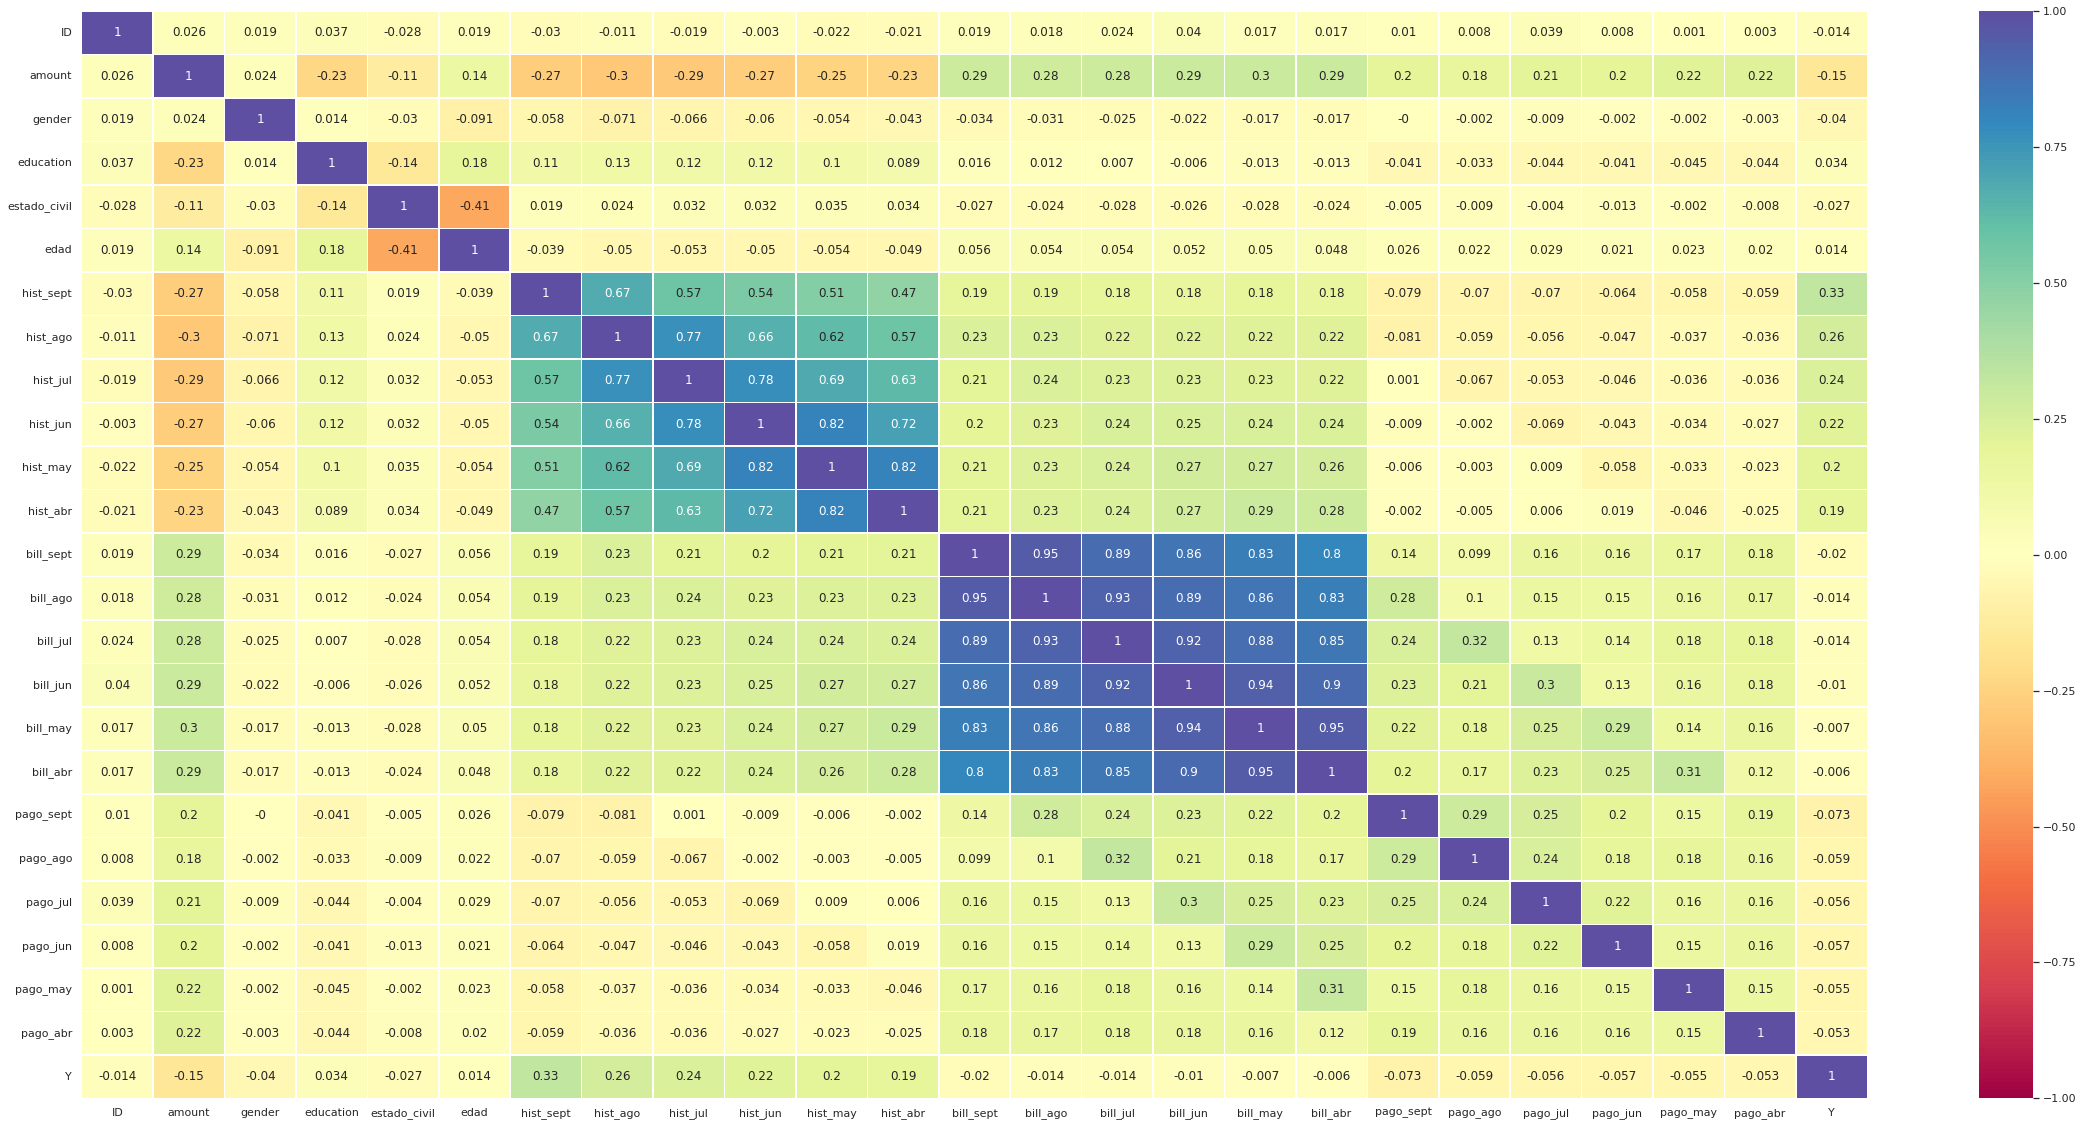

In [14]:
#se realiza una matriz de correlación para encontrar las variables que más aportan a la variable de salida Y.
sns.set(rc={'figure.figsize':(40,20)}) 
corr_matrix = ndf.corr()
ax = sns.heatmap(corr_matrix.round(3), cmap="Spectral", vmin=-1, vmax=1, annot=True, linewidths=.5)
plt.show()

Parece que las variables que mas están relacionadas con la variable de salida son las relacionadas al histórico de pagos. 

# **PCA**

In [35]:
ndf.shape

(29958, 25)

In [42]:
#quitamos ID, correr solo una vez
pca_ndf=ndf.iloc[:,1:-1]


In [43]:
from sklearn.decomposition import PCA
pcs = PCA()
pcs.fit(pca_ndf)
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
#pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,Standard deviation,Proportion of variance,Cumulative proportion
0,166585.075260,6.105714e-01,0.610571
1,115824.701663,2.951662e-01,0.905738
2,37256.816553,3.054047e-02,0.936278
3,27747.103019,1.693946e-02,0.953218
4,20698.682257,9.426483e-03,0.962644
5,20278.007203,9.047213e-03,0.971691
6,18520.701884,7.547083e-03,0.979238
7,17040.234998,6.388743e-03,0.985627
8,16294.110103,5.841516e-03,0.991469
9,11615.224907,2.968380e-03,0.994437


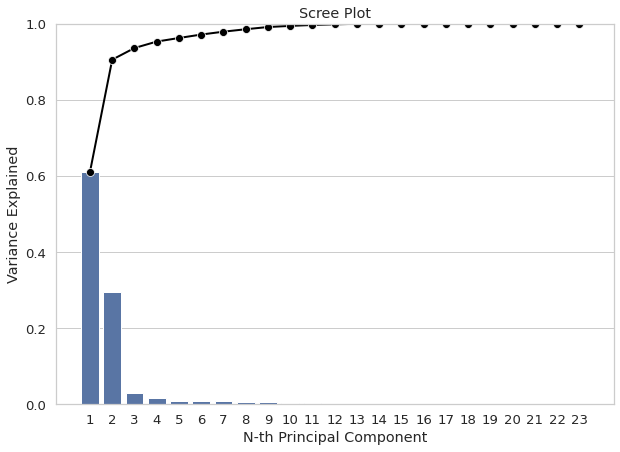

In [44]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

# **Paso 1:**
Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

R// con **2** componentes explicamos el 90% del dato, con **4** explicamos el 95% y con **12** componentes ya explicaríamos el 100%

In [45]:
from sklearn.decomposition import PCA
pcs = PCA(n_components=4)
pcs.fit(pca_ndf)
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
#pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,Standard deviation,Proportion of variance,Cumulative proportion
0,166585.075260,0.610571,0.610571
1,115824.701663,0.295166,0.905738
2,37256.816553,0.030540,0.936278
3,27747.103019,0.016939,0.953218


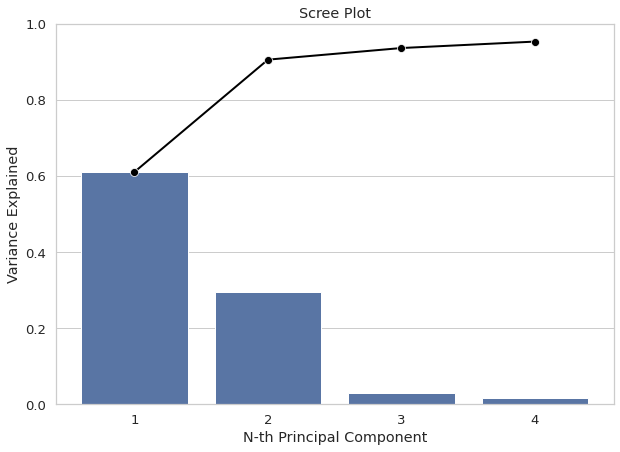

In [46]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

# **Paso 2:**
Interprete cada componente principal en términos de las variables originales

Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

In [47]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=['PC1', 'PC2', 'PC3', 'PC4'],
                                index=['amount', 'gender', 'education', 'estado_civil', 'edad', 'hist_sept','hist_ago', 'hist_jul','hist_jun','hist_may','hist_abr', 'bill_sept','bill_ago','bill_jul', 'bill_jun', 'bill_may','bill_abr','pago_sept','pago_ago','pago_jul', 'pago_jun','pago_may', 'pago_abr'])
pcsComponents_df

,PC1,PC2,PC3,PC4
amount,4.910512e-01,8.693278e-01,-2.055684e-02,-1.841183e-02
gender,-3.601836e-08,1.739054e-07,3.260506e-07,-2.528175e-08
education,-3.886467e-07,-1.461105e-06,-8.234464e-07,1.333762e-07
estado_civil,-2.010117e-07,-4.001328e-07,7.717903e-08,9.606469e-08
edad,5.564628e-06,8.290401e-06,-4.101474e-06,-2.412869e-07
hist_sept,3.441593e-07,-3.804258e-06,-4.165337e-07,-2.626152e-06
hist_ago,5.704261e-07,-4.620466e-06,-5.837432e-07,-2.669882e-06
hist_jul,5.846978e-07,-4.498706e-06,5.099712e-07,-1.788093e-06
hist_jun,6.675526e-07,-4.258007e-06,2.096678e-06,2.221115e-07
hist_may,7.612710e-07,-4.028954e-06,3.450833e-06,-8.788431e-07


In [48]:
#ordenamos los datos para ver los extremos
pcsComponents_df.sort_values(by='PC1', ascending=False)

,PC1,PC2,PC3,PC4
amount,4.910512e-01,8.693278e-01,-2.055684e-02,-1.841183e-02
bill_sept,3.886148e-01,-2.210936e-01,-5.488831e-01,-2.048616e-01
bill_ago,3.815002e-01,-2.261527e-01,-3.909634e-01,-3.777465e-02
bill_jul,3.723168e-01,-2.163018e-01,-4.812921e-02,5.534470e-01
bill_jun,3.465094e-01,-1.938424e-01,2.610192e-01,7.909110e-02
bill_may,3.230118e-01,-1.765984e-01,4.280878e-01,-2.000976e-01
bill_abr,3.086736e-01,-1.671595e-01,4.837145e-01,-3.083679e-01
pago_ago,3.127707e-02,1.080894e-02,1.600579e-01,6.733127e-01
pago_jul,2.680702e-02,1.098725e-02,1.351422e-01,2.829488e-02
pago_sept,2.655072e-02,5.713639e-03,3.748650e-02,1.934771e-01


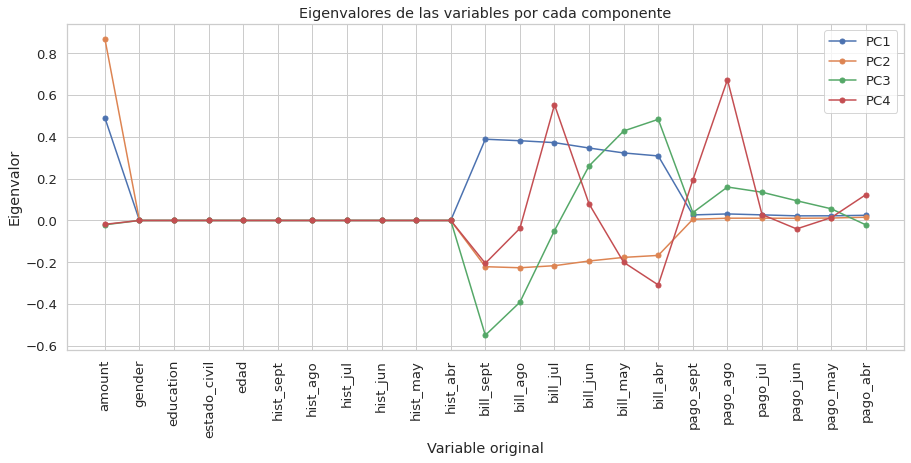

In [49]:
#Eigenvalores

components = pcsComponents_df.columns

plt.figure(figsize=(15,6))

for c in components:
  plt.plot(pcsComponents_df.index, pcsComponents_df[c],  marker='o', markersize=5, label=c)

plt.legend(loc='upper right')

plt.title('Eigenvalores de las variables por cada componente')
plt.xlabel('Variable original')
plt.ylabel('Eigenvalor')

plt.xticks(rotation=90)
plt.show()

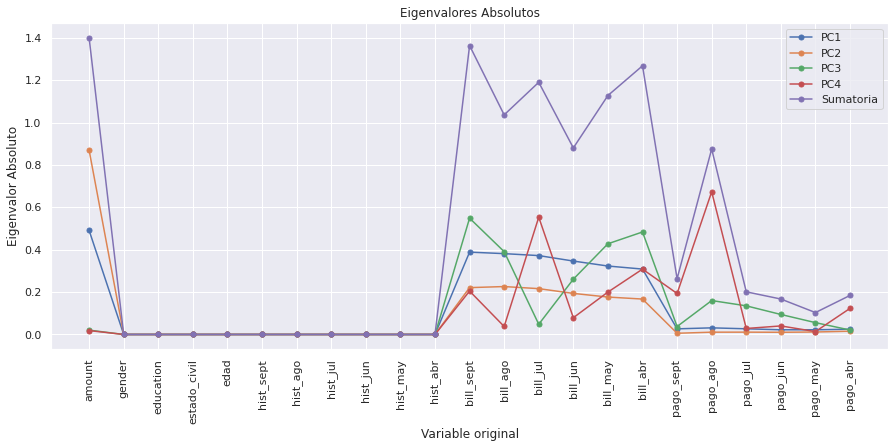

In [56]:
#Eigenvalores absolutos

components = pcsComponents_df.columns

plt.figure(figsize=(15,6))

for c in components:
  plt.plot(pcsComponents_df.index, np.absolute(pcsComponents_df[c]),  marker='o', markersize=5, label=c)

plt.plot(pcsComponents_df.index, np.absolute(pcsComponents_df).sum(axis=1),  marker='o', markersize=5, label="Sumatoria")
plt.legend(loc='upper right')

plt.title('Eigenvalores Absolutos')
plt.xlabel('Variable original')
plt.ylabel('Eigenvalor Absoluto')

plt.xticks(rotation=90)
plt.show()

In [66]:
#Variables más importantes por componente

pd.DataFrame(pcsComponents_df.abs().idxmax()).T

,PC1,PC2,PC3,PC4
0,amount,amount,bill_sept,pago_ago


In [67]:
#Variables menos importantes por componente

pd.DataFrame(pcsComponents_df.abs().idxmin()).T

,PC1,PC2,PC3,PC4
0,gender,gender,estado_civil,gender


In [61]:
#Listado de variables ordenadas por su importancia
pd.DataFrame(np.absolute(pcsComponents_df).sum(axis=1), columns=['Suma']).sort_values(by='Suma',  ascending=False)

,Suma
amount,1.399348e+00
bill_sept,1.363453e+00
bill_abr,1.267916e+00
bill_jul,1.190195e+00
bill_may,1.127796e+00
bill_ago,1.036391e+00
bill_jun,8.804621e-01
pago_ago,8.754566e-01
pago_sept,2.632280e-01
pago_jul,2.012314e-01


# **Paso 3:**
Identifique valores atípicos

Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

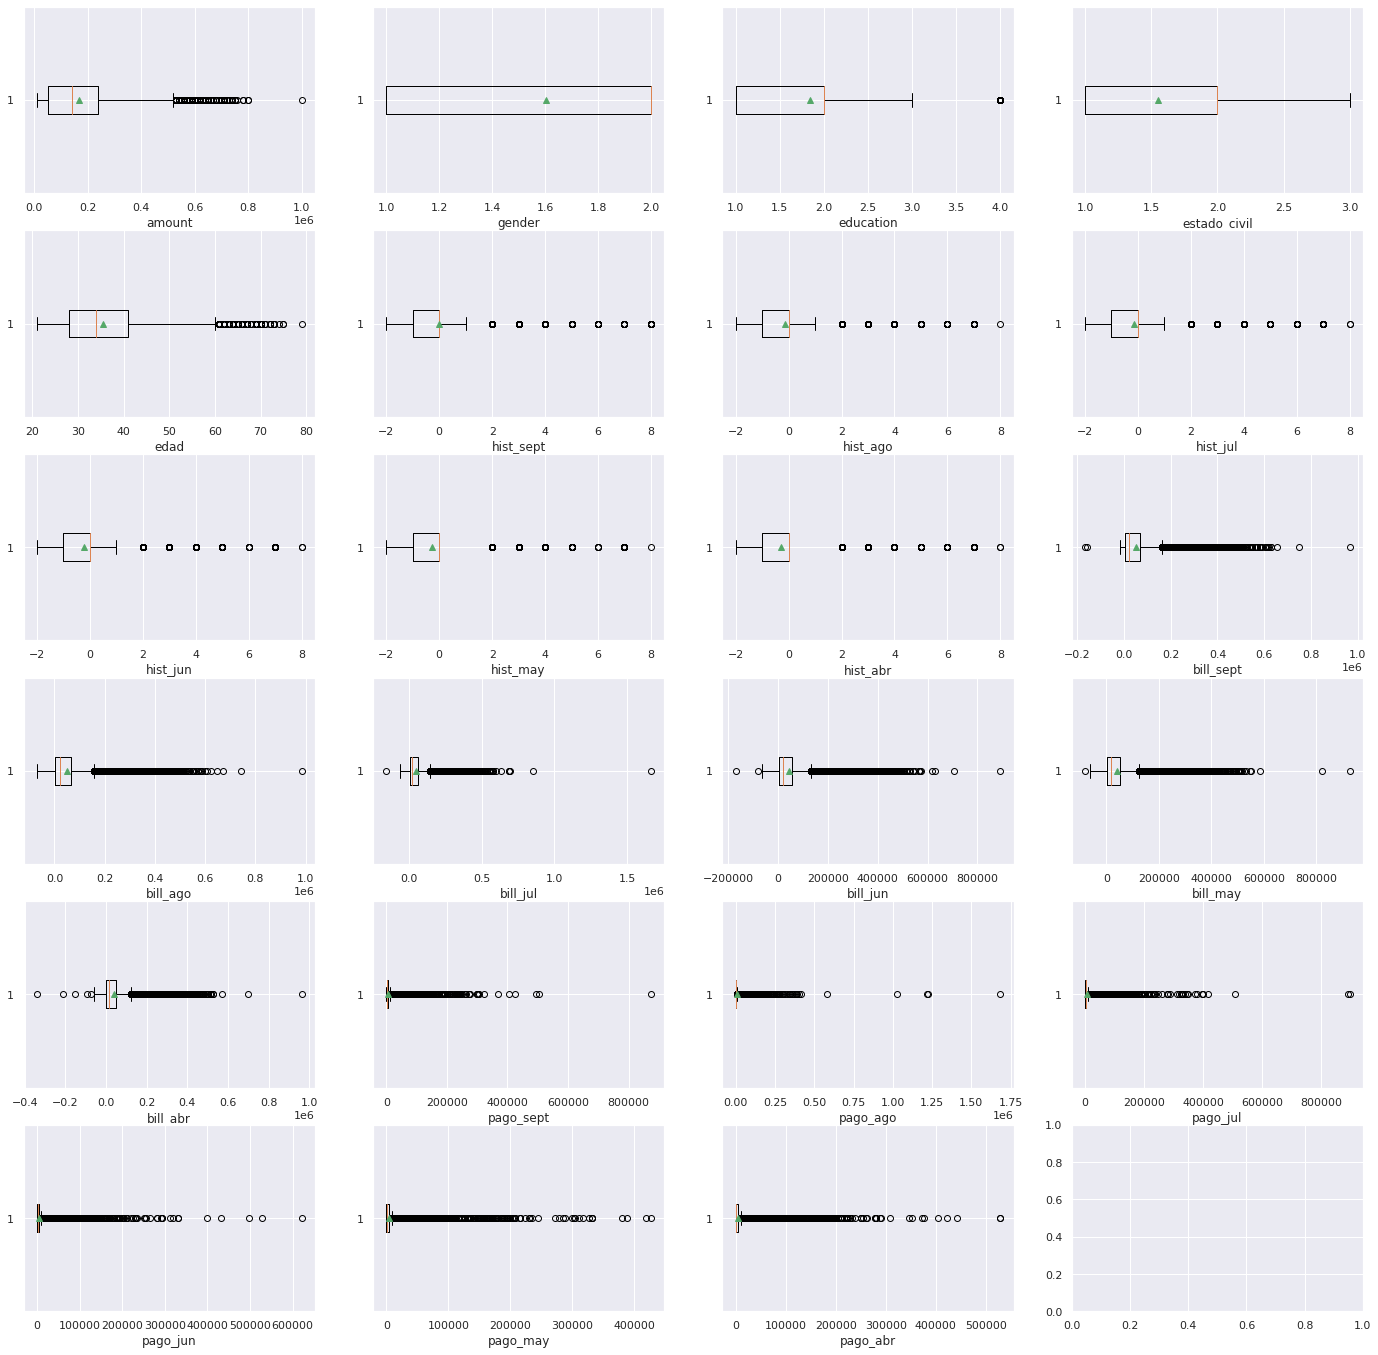

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(24,24)})
i = 0
fig, axes = plt.subplots(6, 4)    
for col in ndf.columns[1:-1]:
  plt.subplot(6,4,i+1)     
  plt.boxplot(ndf[col], showmeans=True, vert=False)   
  plt.xlabel(col)
  i+=1
plt.show()

# **Análisis:**

**¿Cuál es el número de componentes mínimo y por qué?**
>`4`, por que con 4 componentes es posible explicar más del 95% de los datos que se están analizando

**¿Cuál es la variación de los datos que representan esos componentes?**
>Las proporciones de variación de cada componente son:
>
>Componente | Varianza
>---|---
PC1| 0.610571
PC2| 0.295166 	
PC2| 0.030540 	
PC4| 0.016939 	


**¿Cuál es la pérdida de información después de realizar PCA?**
>

**De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**
>

**¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**
>